# Github Link for IE517 at 2023, HW3

https://github.com/kibae-kim/IE-517-ML-in-Fin-Lab-Section-A/tree/main/IE517_F2x_HW3

# Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the Data

- 2721 number of companies
- 37 number features

In [2]:
df = pd.read_csv('HY_Universe.csv')
df

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3.105927e+06,2000000.00,18980000.0,60000.00,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1.721697e+06,1160000.00,11197000.0,5000.00,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4.200313e+06,3520000.00,14000000.0,24000.00,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6.321560e+06,5487500.00,18459000.0,30000.00,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5.936714e+06,3305500.00,72760000.0,90000.00,9.238095,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,629377CC4,NRG,4/18/2017,1/15/2027,7/15/2021,B1,BB-,Nan,B+,6.63,...,0.376000,0.708571,1,0.243429,1.673926e+07,13167000.00,65036000.0,1475000.00,38.043478,4
2717,62940QAA3,NSGHLD,3/14/2007,12/15/2025,Nan,Ba1,BB+,Nan,BB+,7.75,...,0.024540,0.699387,5,0.460123,1.787675e+06,937286.96,12500000.0,93728.69,3.075472,1
2718,62941FAH1,VMED,7/25/2006,8/15/2016,Nan,WR,NR,BB+,NR,9.13,...,0.193798,0.527132,5,0.449612,6.440966e+06,5468000.00,18280000.0,1000000.00,8.896552,1
2719,62943WAA7,NYLD,8/5/2014,8/15/2024,Nan,Ba2,BB,Nan,BB,5.38,...,0.063197,0.605948,3,0.434944,3.923217e+06,3022500.00,16100000.0,25000.00,5.847826,1


- Show every columns names to select adaptable features to be analyzed

In [4]:
columns = df.columns.values

for i in range(df.shape[1]):
    column = columns[i]
    print(column)

CUSIP
Ticker
Issue Date
Maturity
1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Coupon
Issued Amount
Maturity Type
Coupon Type
Maturity At Issue months
Industry
LiquidityScore
Months in JNK
Months in HYG
Months in Both
IN_ETF
LIQ SCORE
n_trades
volume_trades
total_median_size
total_mean_size
n_days_trade
days_diff_max
percent_intra_dealer
percent_uncapped
bond_type
Client_Trade_Percentage
weekly_mean_volume
weekly_median_volume
weekly_max_volume
weekly_min_volume
weekly_mean_ntrades
weekly_median_ntrades


# Histogram of Coupon per Each Industry  

## DataFrame of corresponding Coupon value per each Industry

- Group by given dataframe by Industry
- Aggregate the group based on mean value

In [8]:
criterion = 'Industry'
feature1 = 'Coupon'

df_compact = df[[criterion, feature1]]
group = df_compact.groupby(criterion)
df_agg = group.agg('mean')
df_agg

,Coupon
Industry,
Advertising,6.565000
Aerospace/Defense,6.174643
Agriculture,7.955000
Airlines,6.570000
Apparel,6.106667
...,...
Storage/Warehousing,9.625000
Telecommunications,7.159722
Textiles,6.360000


- Sort DataFrame by Coupon value 
- Reset index of DataFrame as numerical value

In [12]:
Coupon_df = df_agg[[feature1]]
sorted_df = Coupon_df.sort_values(feature1)
reset_df = sorted_df.reset_index()
reset_df

,Industry,Coupon
0,Multi-National,2.805882
1,Sovereign,3.526364
2,Regional(state/provnc),4.084000
3,Insurance,4.462432
4,Electronics,4.815000
...,...,...
64,Retail,19.521975
65,Building Materials,26.790784
66,Packaging Containers,71.191304
67,Food Service,104.864000


- Split DataFrame into former part with 34 industires and latter with a rest of industries

In [13]:
sub_df1 = reset_df.iloc[:34, :]
sub_df2 = reset_df.iloc[34: -1, :]

- Visaulize former part by Histogram

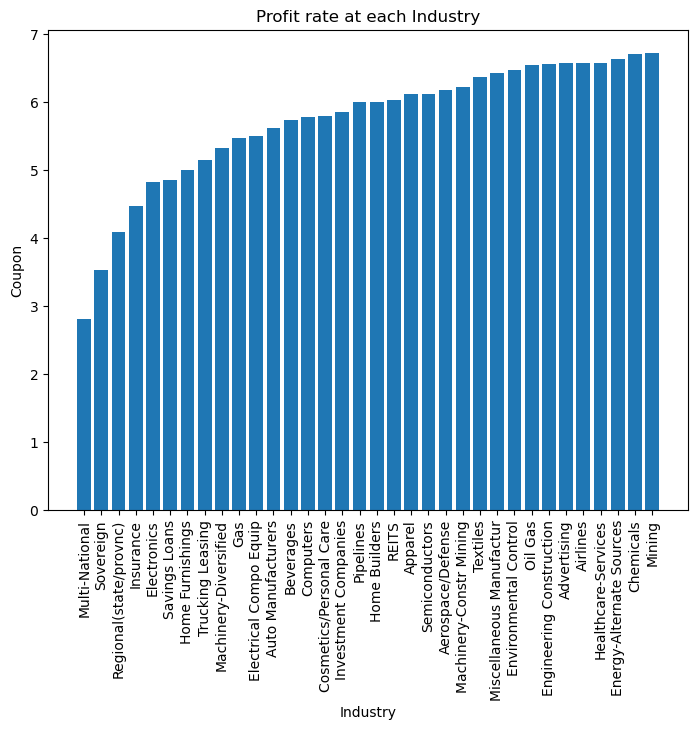

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

series_Industry = sub_df1[criterion]
series_Coupon = sub_df1[feature1]
ax.bar(series_Industry, series_Coupon)

plt.title('Coupon at each Industry')
plt.xlabel('Industry')
plt.ylabel('Coupon')
plt.xticks(rotation = 90)
plt.show()

- Visualize latter part by Histogram
- Both Food Services and Packaging Containers industries have high  level of Coupon

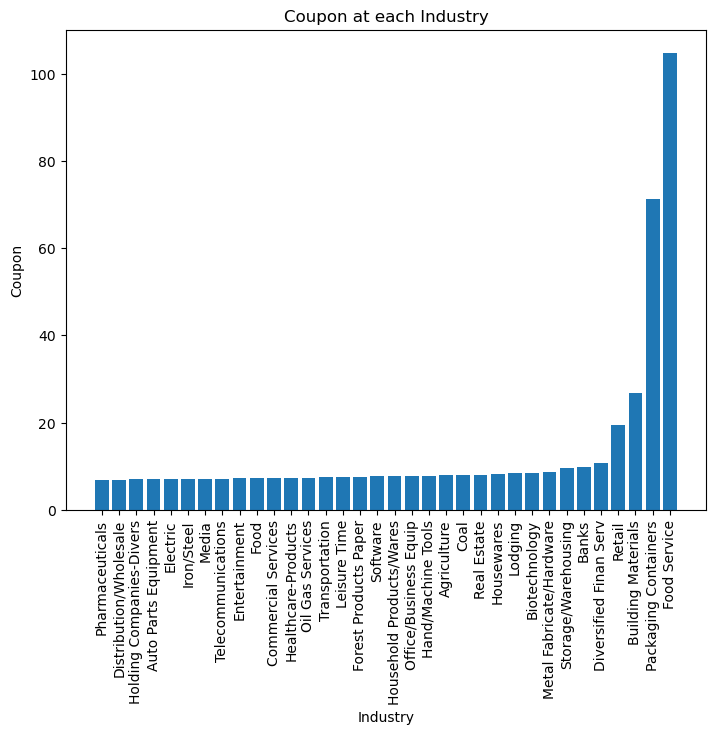

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

series_Industry = sub_df2[criterion]
series_Coupon = sub_df2[feature1]
ax.bar(series_Industry, series_Coupon)

plt.title('Coupon at each Industry')
plt.xlabel('Industry')
plt.ylabel('Coupon')
plt.xticks(rotation = 90)
plt.show()

# Visualize Liquidity Score for each stock belong to Real Estate Industry

- Extract Stocks belongs to Real-Estate field
- There exist 21 companies in the industry

In [32]:
criterion = 'Industry'
industry = 'Real Estate'

conditional = df[criterion] == industry
real_estate = df[conditional]
real_estate

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3.105927e+06,2000000.0,18980000.0,60000.0,3.541176,1
136,008477AE1,AGILE,4/28/2010,4/28/2017,Nan,WR,NR,Nan,NR,8.88,...,0.000000,0.812500,3,0.562500,1.168750e+06,1025000.0,3400000.0,100000.0,2.000000,1
745,09064AAF8,BMR,3/30/2011,4/15/2016,Nan,WR,NR,Nan,NR,3.85,...,0.487179,0.615385,5,0.333333,8.018333e+06,300000.0,23630000.0,125000.0,13.000000,3
746,09064AAH4,BMR,4/23/2014,5/1/2019,Nan,WR,NR,Nan,NR,2.63,...,0.163265,0.551020,5,0.571429,1.088667e+07,2000000.0,30300000.0,360000.0,16.333333,2
793,103738AD2,BRMLBZ,1/21/2011,Nan Field Not Applicable,Nan,WR,NR,WD,NR,8.50,...,0.000000,0.777778,5,0.555556,1.308040e+06,1000000.0,4000000.0,140000.0,2.160000,1
834,12489LAE8,CBG,11/5/2009,6/15/2017,Nan,WR,NR,Nan,NR,11.63,...,0.178654,0.721578,5,0.424594,1.942667e+06,1215000.0,12450000.0,28000.0,3.990741,1
861,12505BAA8,CBG,3/14/2013,3/15/2023,3/15/2018,Baa3,BBB,Nan,BBB-,5.00,...,0.250354,0.804338,3,0.427628,6.468491e+06,4520000.0,140440000.0,139000.0,18.284483,4
862,12505BAC4,CBG,9/26/2014,3/15/2025,12/15/2024,Baa3,BBB,Nan,BBB-,5.25,...,0.183761,0.688034,2,0.427350,3.598429e+06,2081000.0,22593000.0,20000.0,6.685714,1
1031,144523AA5,CARRHO,12/31/2013,1/15/2021,10/23/2017,Nan,Nan,Nan,Nan,5.00,...,0.000000,0.000000,5,1.000000,2.000000e+06,2000000.0,2000000.0,2000000.0,2.000000,2
1032,144523AB3,CARRHO,12/31/2013,1/15/2021,10/23/2017,Nan,Nan,Nan,Nan,5.00,...,0.250000,0.750000,5,0.500000,7.000000e+05,700000.0,1000000.0,400000.0,2.000000,1


- Statistical Summary of Liquidity Score of real-estate stocks

In [51]:
score = 'LiquidityScore'

median = real_estate[score].median()
q1 = real_estate[score].quantile(q=0.25)
q3 = real_estate[score].quantile(q=0.75)
IQR = 1.5 * (q3 - q1)

print('Statisical Summary')
print('median: {}'.format(median))
print('Q1: {}'.format(q1))
print('Q3: {}'.format(q3))
print('IQR: {}'.format(IQR))

Statisical Summary
median: 13.45511547
Q1: 11.80300579
Q3: 16.09794804
IQR: 6.4424133749999974


- Split DataFrame into 2 DataFrames

In [46]:
real_estate1 = real_estate.iloc[:8,:]
real_estate2 = real_estate.iloc[8:-1,:]

In [47]:
categorical = 'Ticker'
numerical = 'LiquidityScore'

- Visualize Liquidity Score of 1st dataFrame through Violin plot

<AxesSubplot:xlabel='Ticker', ylabel='LiquidityScore'>

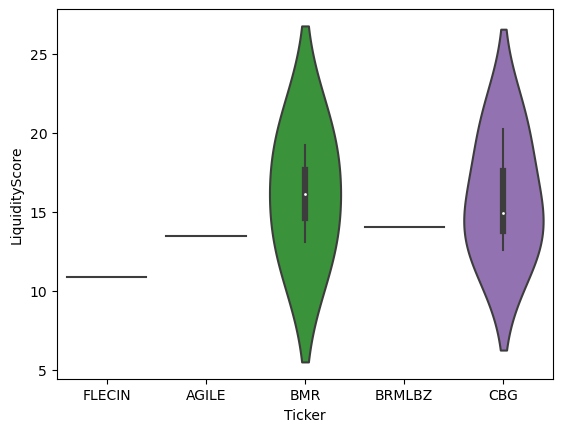

In [48]:
sns.violinplot(x=categorical, y=numerical, data=real_estate1)

- Visualize Liquidity Score of 2nd DataFrame through Box Plot

<AxesSubplot:xlabel='Ticker', ylabel='LiquidityScore'>

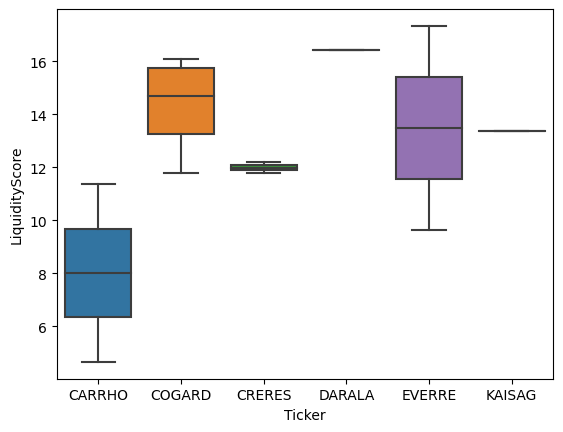

In [49]:
sns.boxplot(x=categorical, y=numerical, data=real_estate2)

# Academic Integrity Instruction

In [52]:
print("My name is Kibae Kim")
print("My NetID is: kibaek2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Kibae Kim
My NetID is: kibaek2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
